# Multilayer Perceptron
Inspired by the __brain__, a neural network consists of __neurons__ which operate similar to their counterparts in the brain. A neuron receives its input from roughly thousands of other neurons via its __synapses__. These inputs are approximately summed and a threshold function is applied in each one of them. When the input exceeds this threshold the neuron generates an electrical spike that travels down the __axon__, to the next set of neurons.
A perceptron follows similar kind of behavior in mathematical terms.

## Single-layer Neural Network
The perceptron is a binary classifier that _attempts_ to find an $M$ dimensional hyperplane $w$ defined by $w \cdot x=w^{\top} x=b$ where $x, w \in \mathbb{R}^{M},$ and $b \in \mathbb{R}$. There are $M$ dimensions/features in the dataset of $N$ instances/rows.

The hyperplane separates the data points $X$ into two categories \{0,1\}, originally provided by the $y$ vector (ground truth).

$\mathbf{f}(x)=\hat{y}=\left\{\begin{array}{ll}1, & \text { if } w \cdot x+b>0 \\ 0, & \text { otherwise }\end{array}\right.$

Finding out the hyperplane or $w$, the perceptron training algorithm, such as Adaline, updates $w$ by iteratively computing the classification error:

$w \leftarrow w+\Delta w,$ where $\Delta w=-\eta \nabla J(w)$ and $\nabla J(w)$ is the cost function and $\eta$ is the learning rate.

The gradient of $J$, or $\nabla J(w)$ is computed by partial derivatives:  
$\frac{\partial}{\partial w_{j}} J(w)=-\sum_{i}\left(y^{(i)}-a^{(i)}\right) x_{j}^{(i)},$ for $j=1, \ldots, M$ and $i=1, \ldots, N$

Activation function $\phi(z)$ where the net input $z$ is the linear combination of the weights that are connecting the input to the output: $z=\sum_{j} w_{j} x_{j}=w^{\top} x$

The threshold function $g(z)$ is just a 0-threshold or binary step:  
$\hat{y}=\left\{\begin{array}{ll}+1, & \text { if } g(z) \geq 0 \\ -1, & \text { otherwise }\end{array}\right.$

# XOR problem
Since a perceptron uses a single hyperplane it is unable to solve the XOR problem because is __not linearly separable.__ As an example, in 2 dimensions the XOR problem is given as in the following:

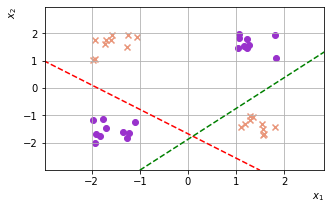

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from numpy import array, full, concatenate
from numpy.random import ranf

# Example XOR dataset
X = concatenate([array([-2,-2])+ranf([10,2]), array([1,1])+ranf([10,2]),
                 array([-2,1])+ranf([10,2]), array([1,-2])+ranf([10,2])], axis=0)
y = concatenate([full(10, 0), full(10, 0), full(10, 1), full(10, 1)], axis=0)

plt.figure(figsize=(5, 3))

def plotX(_X, _y, _ax=None):  # Max 5 clusters/classes
    def get_minmax(_X, _m):  # _m = margin for visuals
        return _X[:,0].min()-_m, _X[:,0].max()+_m, _X[:,1].min()-_m, _X[:,1].max()+_m
    
    Colors = ['darkorchid', 'darksalmon', 'darkgreen', 'darkgrey', 'darkseagreen']
    Markers = ['o', 'x', '+', '1', '.']
    for c in range(max(_y)+1):
        plt.scatter(_X[_y==c,0], _X[_y==c,1], marker=Markers[c], color=Colors[c])
    #
    plt.grid(True, which='both')
    #
    if _ax is not None:
        _ax.get_xaxis().set_ticks([])
        _ax.get_yaxis().set_ticks([])
    #
    x1_min, x1_max, x2_min, x2_max = get_minmax(_X, 1)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel(r'$x_1$', horizontalalignment='right', x=1.0)
    plt.ylabel(r'$x_2$', horizontalalignment='right', y=1.0)

plotX(X,y)
plt.plot((-3,1.5),(1,-3), c='r', ls='--')
plt.plot((-1,3),(-3,1.5), c='g', ls='--')
plt.show()

---

## Multilayer Neural Network Architecture

In a multilayer neural network structure, the input is weighted and summed at one or more hidden layers representing a directed graph. When each layer output is input to the next layer this architecture is called __feedforward__ neural network. When the output of a layer is __fed-back__ to a previous layer then it is called __recurrent__ neural network in which from a time step to the next some neuron layers will remember information they had in the previous time-step. This gives the neuron the ability of working as a memory cell.

The input vector $a^{(i n)}$ has a bias value: $a^{(i n)}=\left[\begin{array}{c}1 \\ x_{1}^{(i n)} \\ \vdots \\ x_{m}^{(i n)}\end{array}\right]$

The output vector is one-hot encoded categories.

In the figure, an example feedforward neural network is provided with 2 hidden layers, M=4 and the number of classes is 3 and $a_{0}^{(i n)}, a_{0}^{(h 1)}, a_{0}^{(h 2)}$ are bias units and set to 1. The predicted class can be stated by checking the highest value on the output layer, e.g. if $a_{2}^{(o u t)}$ is the highest then the predicted class is 2.

Multilayer feedforward architecture are universal function approximators.

__Deep Neural Networks:__ When there are more then 1 hidden layers the neural network is called a __deep__ neural network.

---

## Training MLP via Forward Propagation

The training data is propagated on the network and based on the output error, network weights are updated to minimize the cost function. The error at the output is __backpropagated__ and the model is updated. (Note that derivative is a linear operator)

Net input, $z_{1}^{(h)}=a_{0}^{(i n)} w_{0,1}^{(h)}+a_{1}^{(i n)} w_{1,1}^{(h)}+\ldots+a_{m}^{(i n)} w_{m, 1}^{(h)}$

Activation, $a_{1}^{(h)}=\phi\left(z_{1}^{(h)}\right)$

The activation function has to be differentiable so we can use gradient-based approaches to minimize the error and find weights. Generally non-linear activation function work good and one example is the sigmoid function:

$\phi(z)=\frac{1}{1+e^{-z}} \ldots \ldots \ldots (1)$

Clearly `numpy` uses efficient loops for linear algebra operations. Net input and activation for all $N$ data points:

$Z^{(h)}=A^{(i n)} W^{(h)},$ then $A^{(h)}=\phi\left(Z^{(h)}\right),$ and finally $Z^{(o u t)}=A^{(h)} W^{(o u t)},$ and
$A^{(o u t)}=\phi\left(Z^{(o u t)}\right) \ldots \ldots \ldots .(2)$

Sigmoid function derivative:

$\phi^{\prime}=\frac{\partial}{\partial z}\left(\frac{1}{1+e^{-z}}\right)=\phi(z)(1-\phi(z))=a(1-a) \ldots \ldots \ldots (3)$

Cost function:

$J(w)=\frac{1}{2} \sum_{i}\left(y^{[i]}-\phi\left(z^{[i]}\right)\right)^{2}$ i.e. Sum of Squared Errors

Derivative of cost function:

$\frac{\partial J}{\partial w_{j}}=-\sum_{i}\left(y^{[i]}-\phi\left(z^{[i]}\right)\right) x_{j}^{[i]}$

Log-likelihood cost function:

$J(w)=-\sum_{i=1}^{n}\left[y^{[i]} \log \left(\phi\left(z^{[i]}\right)\right)+\left(1-y^{[i]}\right) \log \left(1-\phi\left(z^{[i]}\right)\right)\right]$ since maximizing log of the cost is easier and does not break the optimization.

Substitute $a$, the main cost function for optimizing the neural network (without the regularization component):

$J(w)=-\sum_{i=1}^{n} y^{[i]} \log \left(a^{[i]}\right)+\left(1-y^{[i]}\right) \log \left(1-a^{[i]}\right) \ldots \ldots \ldots .(4)$

Backpropagate the error from output to the input:

$\delta^{(o u t)}=a^{(o u t)}-y \ldots \ldots \ldots (5)$

$\delta^{(h)}=\delta^{(\text {out})}\left(W^{(\text {out})}\right)^{\top} \odot\left(a^{(h)} \odot\left(1-a^{(h)}\right)\right) \ldots \ldots \ldots (6)$

$\frac{\partial}{\partial w_{i, j}^{(o u t)}} J(W)=a_{j}^{(h)} \delta_{i}^{(o u t)} \ldots \ldots \ldots (7)$

$\frac{\partial}{\partial w_{i, j}^{(h)}} J(W)=a_{j}^{(i n)} \delta_{i}^{(h)} \ldots \ldots \ldots (8)$

Update weights:

$W^{(l)}=W^{(l)}-\eta \Delta^{(l)} \ldots \ldots \ldots (9)$

---

Derivation of Eq.4 to Eq.7:

Given (1.) $a^{o}=a^{h} w^{o} \Rightarrow \frac{\partial a^{o}}{\partial w^{o}}=a^{h},$ and
(2.) $\phi^{\text {оиt}^{\prime}}=a^{o}\left(1-a^{o}\right)$

$\frac{\partial J}{\partial w^o} = y \frac{1}{a^o} \frac{\partial a^o}{\partial w^o} {\phi^{out}}^\prime + (1-y) \frac{1}{1-a^o} (-\frac{\partial a^o}{\partial w^o}{\phi^{out}}^\prime) = ya^h (1-a^o) + (1-y)(-a^h)(a^o) = (y-a^o)a^h = \delta^o a^h $

---

## Worked Example

The following example uses MNIST dataset: MNIST database http://yann.lecun.com/exdb/mnist/

In [3]:
def load_mnist(path, kind='train'):
    from numpy import fromfile, uint8
    import os
    import struct
    
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = fromfile(lbpath, dtype=uint8)
        with open(images_path, 'rb') as imgpath:
            magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
            images = fromfile(imgpath, dtype=uint8).reshape(len(labels), 784)
            images = ((images / 255.) - .5) * 2
    #
    return images, labels

X_train, y_train = load_mnist('datasets/', kind='train')
print(f'Rows= {X_train.shape[0]}, columns= {X_train.shape[1]}')

X_test, y_test = load_mnist('datasets/', kind='t10k')
print(f'Rows= {X_test.shape[0]}, columns= {X_test.shape[1]}')

Rows= 60000, columns= 784
Rows= 10000, columns= 784


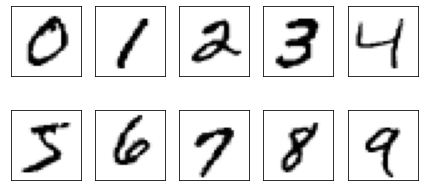

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

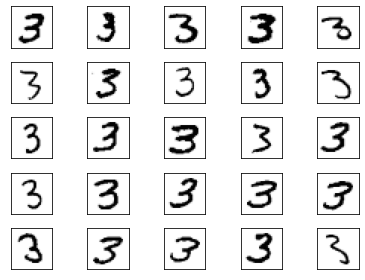

In [5]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 3][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

from numpy import sum, float

import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')

In [7]:
%%time

# 1 layer neural network
mlp = MLPClassifier(hidden_layer_sizes=(10,),max_iter=300)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
test_acc = ((sum(y_test == y_pred)).astype(float) / y_test.shape[0])

print(f'Accuracy= {test_acc*100:.2f}%')
print(confusion_matrix(y_test,y_pred))

Accuracy= 93.43%
[[ 948    0    7    1    1   11    4    4    4    0]
 [   0 1121    2    1    0    0    3    1    7    0]
 [   9   10  963    9    4    6    6   10   14    1]
 [   1    4   13  936    4   21    0   11   16    4]
 [   2    1    8    1  929    3    7    5    2   24]
 [   8    6    2   18    6  816   12    7   12    5]
 [  12    5    8    0   14   20  894    1    4    0]
 [   0   10   19    7    3    3    0  962    4   20]
 [   5   13    6   25   12   14   10   11  864   14]
 [   5    7    4    6   38    7    0   26    6  910]]
CPU times: user 10min 9s, sys: 1min 9s, total: 11min 18s
Wall time: 1min 25s


In [8]:
%%time

# 2 layer neural network
mlp = MLPClassifier(hidden_layer_sizes=(10,10),max_iter=300)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
test_acc = ((sum(y_test == y_pred)).astype(float) / y_test.shape[0])

print(f'Accuracy= {test_acc*100:.2f}%')
print(confusion_matrix(y_test,y_pred))

Accuracy= 93.69%
[[ 954    0    3    2    2    4   12    2    1    0]
 [   0 1120    2    2    1    2    2    1    5    0]
 [   8    2  972   11    3    1   10    8   17    0]
 [   3    0   18  952    1   10    2   13    8    3]
 [   2    1   10    2  912    1   10    5    3   36]
 [  13    6    6   43    3  776   12    5   18   10]
 [  16    3    7    0    3    6  920    0    3    0]
 [   4    6   20   11    5    0    1  959    2   20]
 [  11    4   11   31    6   11   10   12  864   14]
 [  10    6    0    4   25    7    0   11    6  940]]
CPU times: user 11min 13s, sys: 1min 20s, total: 12min 33s
Wall time: 1min 34s


In [9]:
%%time

# 1 layer neural network, size 20
mlp = MLPClassifier(hidden_layer_sizes=(20,),max_iter=300)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
test_acc = ((sum(y_test == y_pred)).astype(float) / y_test.shape[0])

print(f'Accuracy= {test_acc*100:.2f}%')
print(confusion_matrix(y_test,y_pred))

/Users/josephcrandall/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy= 94.97%
[[ 958    0    2    4    3    3    4    2    3    1]
 [   0 1116    2    2    1    0    5    1    7    1]
 [   5    4  971   13    8    0    4   11   14    2]
 [   3    0   11  959    2    7    0   11   14    3]
 [   2    0    2    1  938    2    5    4    3   25]
 [   6    0    4   17    3  820   17    3   15    7]
 [   7    3    8    0   10   13  911    0    6    0]
 [   1    5   16    7    2    1    0  976    3   17]
 [   9    2    5   19    6    8    6    6  900   13]
 [   8    4    1    6   24    6    0    5    7  948]]
CPU times: user 43min 7s, sys: 3min 38s, total: 46min 46s
Wall time: 5min 52s


__Question:__ Which network is better? (A.) 1 hidden-layer, size 10 (B.) 2 hidden-layers, size 10 each (C.) 1 hidden-layer, size 20?

Let's see a neural network with 1 hidden layer implemented from scratch. Note that the source lines that correspond to the above equations are commented.

In [10]:
from numpy import random, zeros, exp, clip, dot, log, sum, argmax, unique, arange, float
    
class NeuralNetMLP(object):
    def __init__(self, n_hidden=30, epochs=100, eta=0.001, minibatch_size=1, seed=None):
        self.random = random.RandomState(seed)  # used to randomize weights
        self.n_hidden = n_hidden  # size of the hidden layer
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
    
    @staticmethod
    def onehot(y, n_classes):  # one hot encode the input class y
        onehot = zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.0
        return onehot.T
    
    @staticmethod
    def sigmoid(z):  # Eq 1
        return 1.0 / (1.0 + exp(-clip(z, -250, 250)))

    def _forward(self, X):  # Eq 2
        z_h = dot(X, self.w_h)
        a_h = self.sigmoid(z_h)
        z_out = dot(a_h, self.w_out)
        a_out = self.sigmoid(z_out)
        return z_h, a_h, z_out, a_out

    @staticmethod
    def compute_cost(y_enc, output):  # Eq 4
        term1 = -y_enc * (log(output))
        term2 = (1.0-y_enc) * log(1.0-output)
        cost = sum(term1 - term2)
        return cost

    def predict(self, X):
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        import sys
        n_output = unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output))
        self.w_h = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden))
        y_train_enc = self.onehot(y_train, n_output)  # one-hot encode original y
        for i in range(self.epochs):
            indices = arange(X_train.shape[0])
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])
                sigmoid_derivative_h = a_h * (1.0-a_h)  # Eq 3
                delta_out = a_out - y_train_enc[batch_idx]  # Eq 5
                delta_h = (dot(delta_out, self.w_out.T) * sigmoid_derivative_h)  # Eq 6
                grad_w_out = dot(a_h.T, delta_out)  # Eq 7
                grad_w_h = dot(X_train[batch_idx].T, delta_h)  # Eq 8
                self.w_out -= self.eta*grad_w_out  # Eq 9
                self.w_h -= self.eta*grad_w_h  # Eq 9
            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(X_train)
            cost = self.compute_cost(y_enc=y_train_enc, output=a_out)
            y_train_pred = self.predict(X_train)  # monitoring training progress through reclassification
            y_valid_pred = self.predict(X_valid)  # monitoring training progress through validation
            train_acc = ((sum(y_train == y_train_pred)).astype(float) / X_train.shape[0])
            valid_acc = ((sum(y_valid == y_valid_pred)).astype(float) / X_valid.shape[0])
            sys.stderr.write('\r%d/%d | Cost: %.2f ' '| Train/Valid Acc.: %.2f%%/%.2f%% '%
                (i+1, self.epochs, cost, train_acc*100, valid_acc*100))
            sys.stderr.flush()
        #
        return self

In [11]:
# Define and fit the neural network
nn = NeuralNetMLP(n_hidden=20, epochs=300, eta=0.0005, minibatch_size=100, seed=1)

nn.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:]) ;

300/300 | Cost: 15436.03 | Train/Valid Acc.: 96.21%/95.50% 

In [12]:
# Define and fit the neural network
nn = NeuralNetMLP(n_hidden=20, epochs=300, eta=0.0005, minibatch_size=100, seed=1)

nn.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:]) ;

300/300 | Cost: 15436.03 | Train/Valid Acc.: 96.21%/95.50% 

In [13]:
y_pred = nn.predict(X_test)
test_acc = ((sum(y_test == y_pred)).astype(float) / y_test.shape[0])

print(f'Accuracy= {test_acc*100:.2f}%')
print(confusion_matrix(y_test,y_pred))

Accuracy= 94.12%
[[ 959    0    1    0    4    1    9    1    5    0]
 [   0 1100    3    2    1    0    5    1   23    0]
 [  14    0  961   13    4    0    9   11   20    0]
 [   2    3   13  955    0   13    1    7   10    6]
 [   0    2    2    1  937    1    5    6    4   24]
 [   8    5    2   39    6  775   13    9   27    8]
 [  13    4    4    0    6   14  903    1   13    0]
 [   3    6   13    7    3    0    0  980    4   12]
 [   3    4    6   12    9    6    5   11  915    3]
 [   4    5    0   17   24    4    1   21    6  927]]


Note that in the above code,
* L2 regularization term (to diminish overfitting)
* Backpropagation components (to shape the sigmoid function)
* Shuffling of the input data (avoiding certain dataset orders that would lead to biased network training) are skipped.

The above code demonstrates the absolute primitive complete version of a 1 hidden layer neural network model.

__Question:__ Do multiple runs lead to a variation in classification errors?

---